#### Project Packages and Early set up

For this project, I will analyze a diverse dataset of cars to explore their specifications and develop a comprehensive categorization system for an upcoming web application. The dataset includes columns detailing various attributes such as price, model year, model, condition, number of cylinders, fuel type, odometer reading, transmission type, car type, paint color, drivetrain, posting date, and days listed. By leveraging this information, I will address minor issues in the code and implement sorting methods to enhance the user experience in the application.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import plotly.express as px
import os
print("Packages imported successfully!")

Packages imported successfully!


In [90]:
root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
dataset_path = os.path.join(root_dir, 'vehicles_us.csv')

print("Root Directory:", root_dir)
print("Dataset Path:", dataset_path)

df = pd.read_csv(dataset_path)
print(df.head()) 

Root Directory: c:\Users\betak\learningsoftwaredevelopment\sprint-4-project\sprint-4-venv
Dataset Path: c:\Users\betak\learningsoftwaredevelopment\sprint-4-project\sprint-4-venv\vehicles_us.csv
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22         

The graph above reveals a clear trend: as anticipated, there is a notably higher volume of cars sold at lower prices compared to those at higher price points. Importantly, within this dataset, the most expensive vehicles being purchased are still priced below $80,000. The purpose of this initial analysis is to understand the range of prices in the dataset and identify any potential issues, such as significant missing values, early in the project.

### Editing the Dataset

In [50]:
print(df)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

Here we can see where many of the issues lie. I will address the columns from left to right and resolve any problems that arise. **Price** appears to be fine; as observed in the graph, most cars are priced lower, which explains the numerous low values and a few price spikes. **Model_year** is incorrectly formatted as a float and will be converted to a string or integer. **Model** seems to be without issues. **Condition** may have too many unique values and will require further analysis. **cylinders** should always be an integer, as you can't have a fraction of a cylinder, so it will be converted to an integer. **Fuel** appears to be acceptable but will be further examined for unique values. **Odometer** contains missing values; depending on their impact on the data, I may either impute the mean range for the missing values or leave them as is. **Transmission** and **Type** seem to be fine as they are. **Paint_color** also has missing values, and while there's no straightforward way to determine them, I will replace all missing values with "unknown" for user clarity. **Is_4wd** should be a boolean, which might help address the missing values. **Date_posted** and **Days_listed** both look okay, with a consistent format.

#### Price

In [51]:
df['price'].info()
df['price']

<class 'pandas.core.series.Series'>
RangeIndex: 51525 entries, 0 to 51524
Series name: price
Non-Null Count  Dtype
--------------  -----
51525 non-null  int64
dtypes: int64(1)
memory usage: 402.7 KB


0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: price, Length: 51525, dtype: int64

As previously noted, **Price** appears to be suitable for basic analysis. Duplicate values in this column are acceptable. Next, we will check for any missing values to ensure data completeness.

In [52]:
# Check for missing values
df['price'].isnull().sum()

np.int64(0)

There appears to not be any missing values in the **price** column. 

#### Model_year 

In [53]:
# Convert 'model_year' to nullable integer type
df['model_year'] = df['model_year'].fillna(pd.NA).astype('Int64')
df['model_year']

0        2011
1        <NA>
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: Int64

**Model_year** was initially displayed as a float, which could be confusing for future users. To improve clarity, I converted this column to an integer type that supports null values. This approach ensures that missing data is properly represented without introducing placeholder integers that might be misinterpreted as valid years in future analyses or visualizations.

#### Condition

In [54]:
# Print unique values in the 'condition' column
print(df['condition'].unique())
df['condition']

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


0             good
1             good
2         like new
3             fair
4        excellent
           ...    
51520     like new
51521      salvage
51522    excellent
51523         good
51524         good
Name: condition, Length: 51525, dtype: object

Looking at the unique values in the column, there aren't any missing values, but, the unique value "like new" seems a little unprofessional. I'll see the difference between the "like new" cars vs the "excellent" cars and if there isn't much of a difference, I will merge the two.

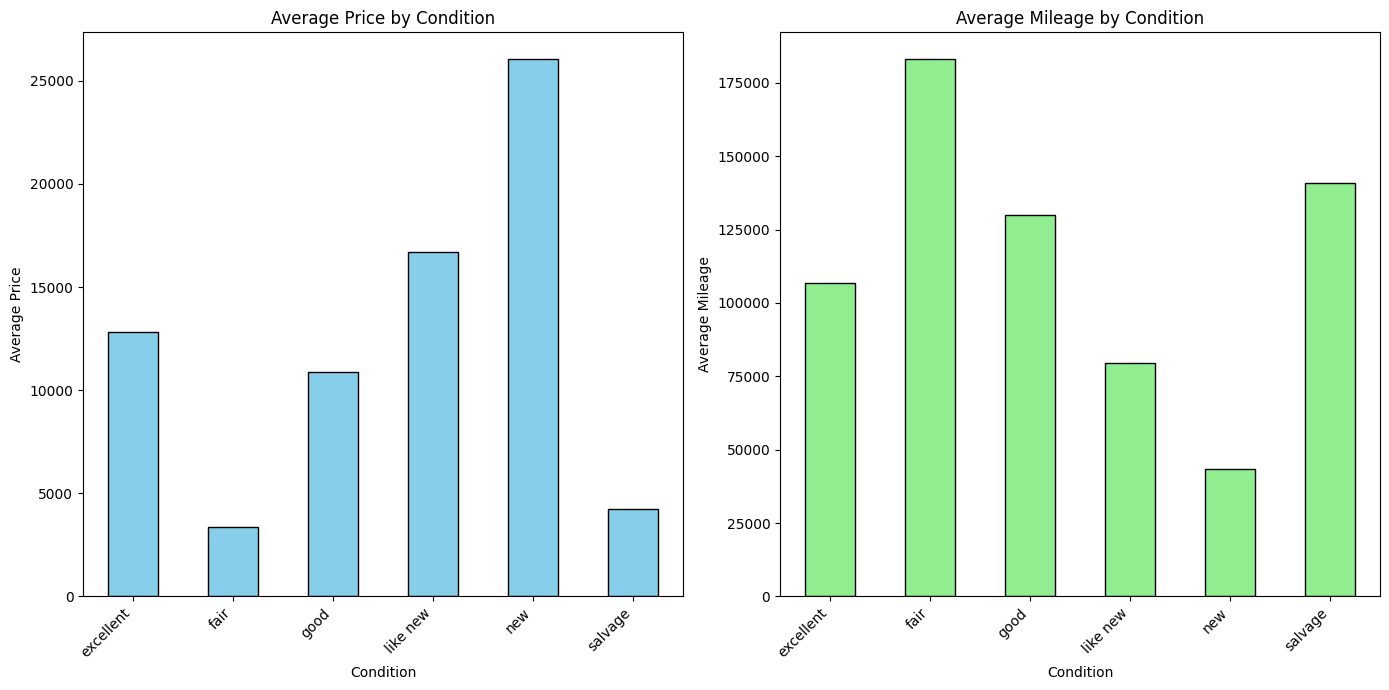

In [55]:
# Calculate average price and mileage for each condition
avg_price = df.groupby('condition')['price'].mean()
avg_mileage = df.groupby('condition')['odometer'].mean()

# Create figure
plt.figure(figsize=(14, 7))

# Bar Plot for Average Price
plt.subplot(1, 2, 1)
avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

# Bar Plot for Average Mileage
plt.subplot(1, 2, 2)
avg_mileage.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Mileage by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Mileage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The "like new" unique value is too different from the other unique values to be able to merge it. So I will check how new "like new" is based on the dataset given so that I could give it a more professional and accurate name. 

In [56]:
# pulling sorted database for both vehicle conditions
new_car_df = df[df['condition'] == 'new']
like_new_df = df[df['condition'] == 'like new']

# Calculate the average model year for both vehicle condtions
average_year_of_new = new_car_df['model_year'].mean()
average_year_of_like_new = like_new_df['model_year'].mean()

print(f"The average year of 'like new' condition vehicles is {average_year_of_like_new:.2f}")
print(f"The average year of 'new' condition vehicles is {average_year_of_new:.2f}")

The average year of 'like new' condition vehicles is 2012.47
The average year of 'new' condition vehicles is 2014.47


With this information we can see that the average year difference between the condition of 'new' and 'like new' is exactly 2 years. Which for cars isn't much. But given the prior data we can see that the difference in their mileage and average price is pretty substantial. So because of this I will just change the 'like new' condition into 'nearly new'.

In [57]:
# Replace 'like new' with 'nearly new' in the condition column
df['condition'] = df['condition'].replace('like new', 'nearly new')

# Display the updated DataFrame
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,nearly new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


#### Cylinders

In [58]:
# Fill missing values with a placeholder (e.g., 0 or another integer) before converting
df['cylinders'] = df['cylinders'].fillna(0).astype(int)
df['cylinders'].head()

0    6
1    6
2    4
3    8
4    4
Name: cylinders, dtype: int64

The primary issue identified was that the **cylinders** column was stored as a float rather than an integer. This resulted in all values having a .0 suffix, which was unnecessary and made the data appear cluttered. Converting this column to integer type not only optimizes storage but also improves the clarity of the dataset.

#### Fuel

In [59]:
print(df['fuel'].unique())
df['fuel'].sample(15)

['gas' 'diesel' 'other' 'hybrid' 'electric']


37394       gas
2212        gas
26320       gas
29462       gas
35009    diesel
39561       gas
48687       gas
42675       gas
35040       gas
27445       gas
13805       gas
3035        gas
10268       gas
34460       gas
6620        gas
Name: fuel, dtype: object

The **fuel** column appears to be largely consistent. The presence of the unique value 'other' may indicate either an unfamiliarity with the vehicle's fuel system by the seller or the use of an unconventional fuel type not covered by the standard options. Without further context, it's challenging to determine the exact reason.

#### Odometer

In [60]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,<NA>,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,nearly new,4,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008,honda pilot,excellent,0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [61]:
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

print(df['odometer'].dtype)
print(df['odometer'].isna().sum())

float64
7892


In [62]:
# Convert to nullable integer type
df['odometer'] = df['odometer'].astype('Int64')
df['odometer'].sample(25)

8806       <NA>
35096    180000
50158    108000
45126    120000
558        <NA>
20437     34000
7022     152108
23730      <NA>
4552      49000
40180     60000
39842     58000
16731    171000
39443    132345
10673    136437
47733     95633
10006    108000
44365      <NA>
46934     18852
9762       <NA>
437        <NA>
19144      <NA>
45666    117520
9939     107430
12443     71000
49245     74000
Name: odometer, dtype: Int64

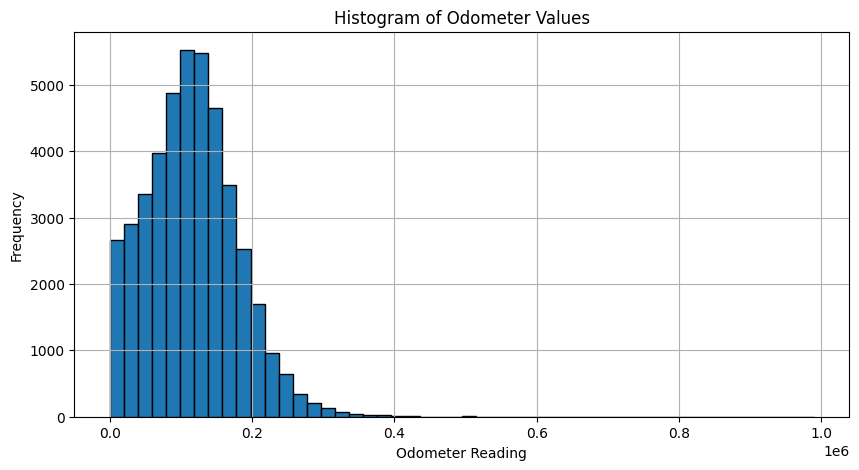

In [63]:
# Drop NaN values for plotting
odometer_clean = df['odometer'].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 5))
plt.hist(odometer_clean, bins=50, edgecolor='black')
plt.title('Histogram of Odometer Values')
plt.xlabel('Odometer Reading')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

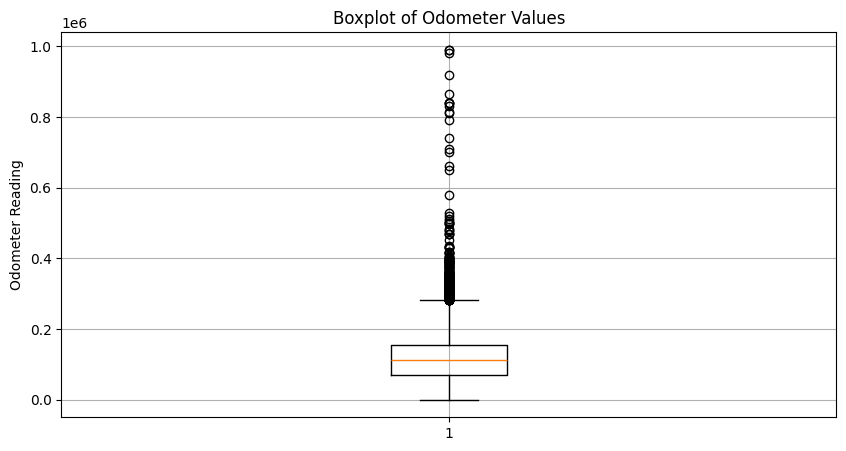

In [64]:
# Drop NaN values for plotting
odometer_clean = df['odometer'].dropna()

# Plotting the boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(odometer_clean)
plt.title('Boxplot of Odometer Values')
plt.ylabel('Odometer Reading')
plt.grid(True)
plt.show()

In [65]:
# Calculate quartiles and IQR
Q1 = odometer_clean.quantile(0.25)
Q3 = odometer_clean.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = odometer_clean[(odometer_clean < (Q1 - 1.5 * IQR)) | (odometer_clean > (Q3 + 1.5 * IQR))]
print("Number of outliers:", len(outliers))
print(outliers.describe())
# Review specific outlier values

Number of outliers: 487
count            487.0
mean     341276.597536
std      104100.029758
min           282863.0
25%           294663.0
50%           309000.0
75%           340000.0
max           990000.0
Name: odometer, dtype: Float64


After careful consideration, I've decided to retain the missing values rather than imputing them with the median or mean. Imputing these values could introduce significant skew, especially given the presence of extremely high odometer readings. By keeping the missing values, we preserve the integrity of the dataset, ensuring that we do not inaccurately represent the mileage of vehicles. This approach maintains the authenticity of the data and avoids misrepresenting the true distribution of odometer readings.

#### Transmission and Type

In [66]:
print("Transmission data")
print(df['transmission'].head(10))

print("Type data")
print(df['type'].head(10))


Transmission data
0    automatic
1    automatic
2    automatic
3    automatic
4    automatic
5    automatic
6    automatic
7    automatic
8    automatic
9    automatic
Name: transmission, dtype: object
Type data
0       SUV
1    pickup
2     sedan
3    pickup
4     sedan
5     sedan
6     sedan
7       SUV
8       SUV
9       SUV
Name: type, dtype: object


In [67]:
print("Unique values in Transmission column:")
print(df['transmission'].unique())

print("Unique values in Type column:")
print(df['type'].unique())


Unique values in Transmission column:
['automatic' 'manual' 'other']
Unique values in Type column:
['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


As previously mentioned, the **transmission** and **type** columns appear to be correctly formatted and do not show any significant issues. The presence of an "other" option in these columns might reflect cases where users selected a category that did not precisely fit their vehicle's specifics. Given the diverse range of vehicle types and transmission options, it is reasonable that not all choices are available in the dataset. To maintain data integrity and avoid providing misleading information, it is best to leave these entries as they are.

#### Paint_color

In [68]:
df['paint_color'] = df['paint_color'].fillna('unknown')
df['paint_color'].head()

0    unknown
1      white
2        red
3    unknown
4      black
Name: paint_color, dtype: object

The only necessary change was replacing missing values in the **paint_color** column with "unknown". For users, seeing values like NaN or Na can be confusing as they may not be familiar with these indicators of missing data. By using "unknown", the information becomes more user-friendly and easier to understand. Although it might be beneficial to apply a similar approach to other columns, doing so could disrupt the numerical integrity of the data.

#### Is_4wd

In [69]:
df['is_4wd'] = df['is_4wd'].fillna(pd.NA).astype('boolean')
df['is_4wd'].head(10)


0    True
1    True
2    <NA>
3    <NA>
4    <NA>
5    True
6    <NA>
7    True
8    True
9    True
Name: is_4wd, dtype: boolean

In [70]:
print("Count of False values in 'is_4wd':", df['is_4wd'].value_counts().get(False, 0))


Count of False values in 'is_4wd': 0


In [71]:
df['is_4wd'] = df['is_4wd'].fillna(False)

In [72]:
df['is_4wd'].head(10)

0     True
1     True
2    False
3    False
4    False
5     True
6    False
7     True
8     True
9     True
Name: is_4wd, dtype: boolean

Since the **is_4wd** column was not originally a boolean, I converted it to a boolean type to accurately represent whether a vehicle has four-wheel drive. I also filled all missing values with False, as this is the most likely value for those entries where the information is missing.

### Updated Database

In [89]:
df.to_csv('vehicles_us.csv', index=False)

# Confirm the changes by reloading and printing the first few rows
df_updated = pd.read_csv('vehicles_us.csv')
print(df_updated.head())

   price  model_year           model   condition  cylinders fuel  odometer  \
0  25500         NaN      ford f-150        good          6  gas   88705.0   
1   5500      2013.0  hyundai sonata  nearly new          4  gas  110000.0   
2  14900      2017.0    chrysler 200   excellent          4  gas   80903.0   
3  14990      2014.0    chrysler 300   excellent          6  gas   57954.0   
4  12990      2015.0    toyota camry   excellent          4  gas   79212.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic  pickup       white    True  2018-10-19           50   
1    automatic   sedan         red   False  2019-02-07           79   
2    automatic   sedan       black   False  2019-04-02           28   
3    automatic   sedan       black    True  2018-06-20           15   
4    automatic   sedan       white   False  2018-12-27           73   

  mileage_segment days_listed_bin  car_age  
0        50k-100k           50-60      NaN  
1       100k-2

array([ 6,  4,  0,  8,  5, 10,  3, 12])

## Statistical Data Analysis (SDA and EDA)

### Price

#### Based on conditions

In [74]:
# Filter the DataFrame for the relevant conditions
filtered_df = df[df['condition'].isin(['excellent', 'new', 'nearly new'])]

# Create the histogram
fig = px.histogram(
    filtered_df,
    x='price',
    color='condition',
    title='Price Distribution of Cars by Condition',
    labels={'price': 'Price', 'condition': 'Condition'},
    nbins=20
)

# Show the plot
fig.show()

On average, nearly new cars are significantly less expensive than both excellent and new cars. Notably, the average cost of new cars is only marginally higher than that of excellent condition cars. But this is based on the count of cars, so the numbers may be skewed. 

With this information we know what cars will be the most expensive, now lets take a look at what cars will be the most affordable on average. 

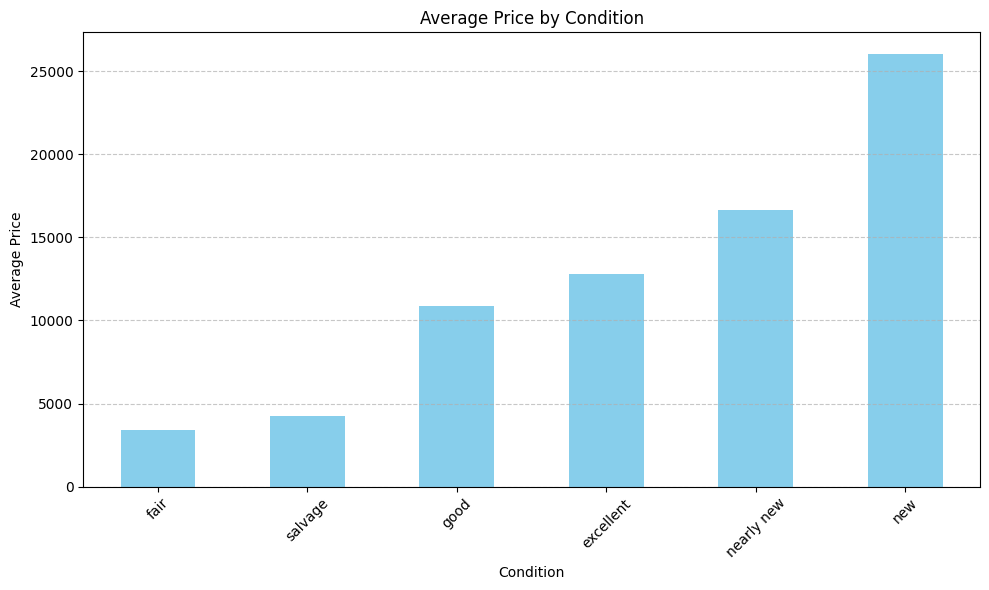

In [75]:
# Group by condition and calculate the average price
average_price = df.groupby('condition')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
average_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

This graph provides a clear overview of average prices for different car conditions. Notably, "like new" appears to be one of the most expensive categories. However, the relatively low number of listings in this condition skews the results, making it seem pricier than it might actually be. For users seeking more affordable options, this graph offers valuable insight into pricing trends. I plan to feature this visualization prominently on the website's homepage to give users a quick snapshot of expected prices before they delve deeper into the data.



#### Based on Odometer readings

C:\Users\betak\AppData\Local\Temp\ipykernel_13084\2374709004.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



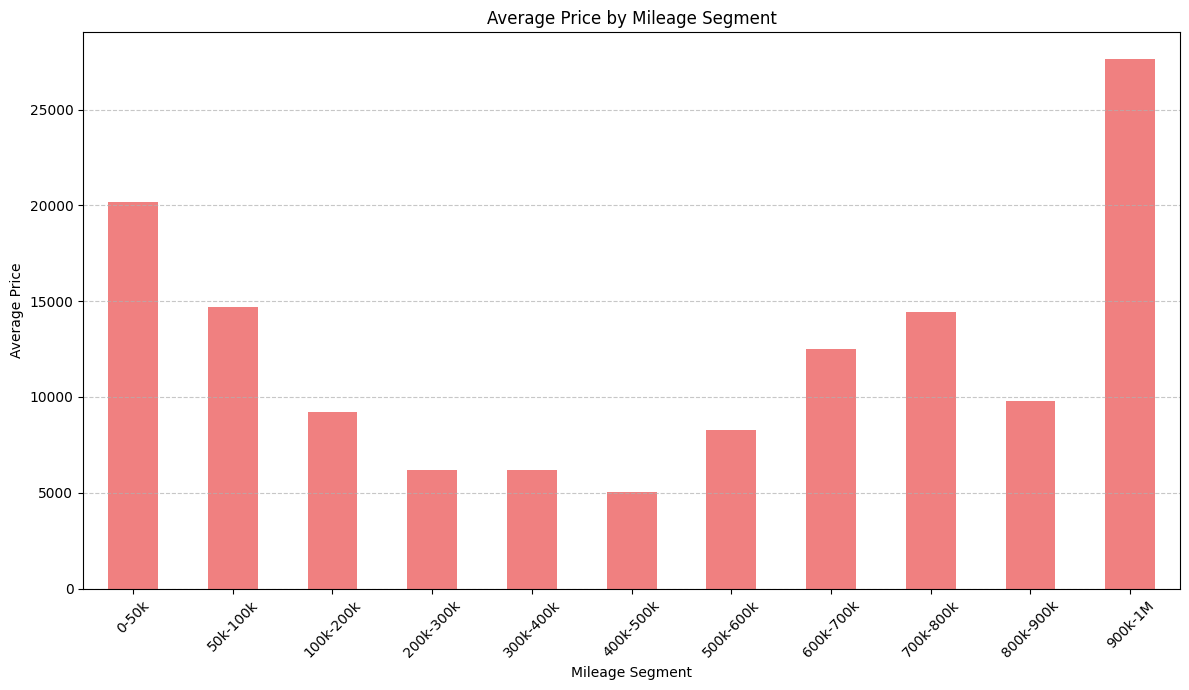

In [76]:
# Define mileage bins for larger segments
bins = [0, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
labels = ['0-50k', '50k-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M']

# Create a new column for mileage segments
df['mileage_segment'] = pd.cut(df['odometer'], bins=bins, labels=labels, right=False)

# Group by mileage segment and calculate the average price
average_price_by_mileage = df.groupby('mileage_segment')['price'].mean()

# Plotting
plt.figure(figsize=(12, 7))
average_price_by_mileage.plot(kind='bar', color='lightcoral')
plt.title('Average Price by Mileage Segment')
plt.xlabel('Mileage Segment')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

This looks normal except for the random spike once the mileage exceeds 900000. Lets take a look at the cars with that mileage and see if we can find an issue.

In [77]:
overloaded_odometer_df = df[df['odometer'] > 900000]
overloaded_odometer_df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,mileage_segment
14245,6000,1996,ram 2500,good,10,gas,920000,automatic,truck,blue,False,2019-02-02,43,900k-1M
17869,59900,1964,chevrolet corvette,nearly new,0,gas,990000,automatic,convertible,red,False,2018-06-17,28,900k-1M
40729,4700,2013,chevrolet cruze,good,6,gas,990000,automatic,sedan,black,False,2018-05-02,4,900k-1M
48962,40000,2014,ram 3500,excellent,0,diesel,980000,automatic,truck,white,True,2018-12-06,7,900k-1M


Typically, used cars with mileage over 100,000 are challenging to sell. However, these four vehicles have mileage exceeding 900,000, which significantly reduces their likelihood of being sold. The accuracy of their condition reports may also be questionable. While some buyers might be interested in purchasing these cars for repair projects or practice, I will add a warning for these specific vehicles to ensure potential buyers are fully informed.

Lets take this into account in the future, there may be an added column at the end that lists it as a warning or salvage category. 

#### Based on the Model:

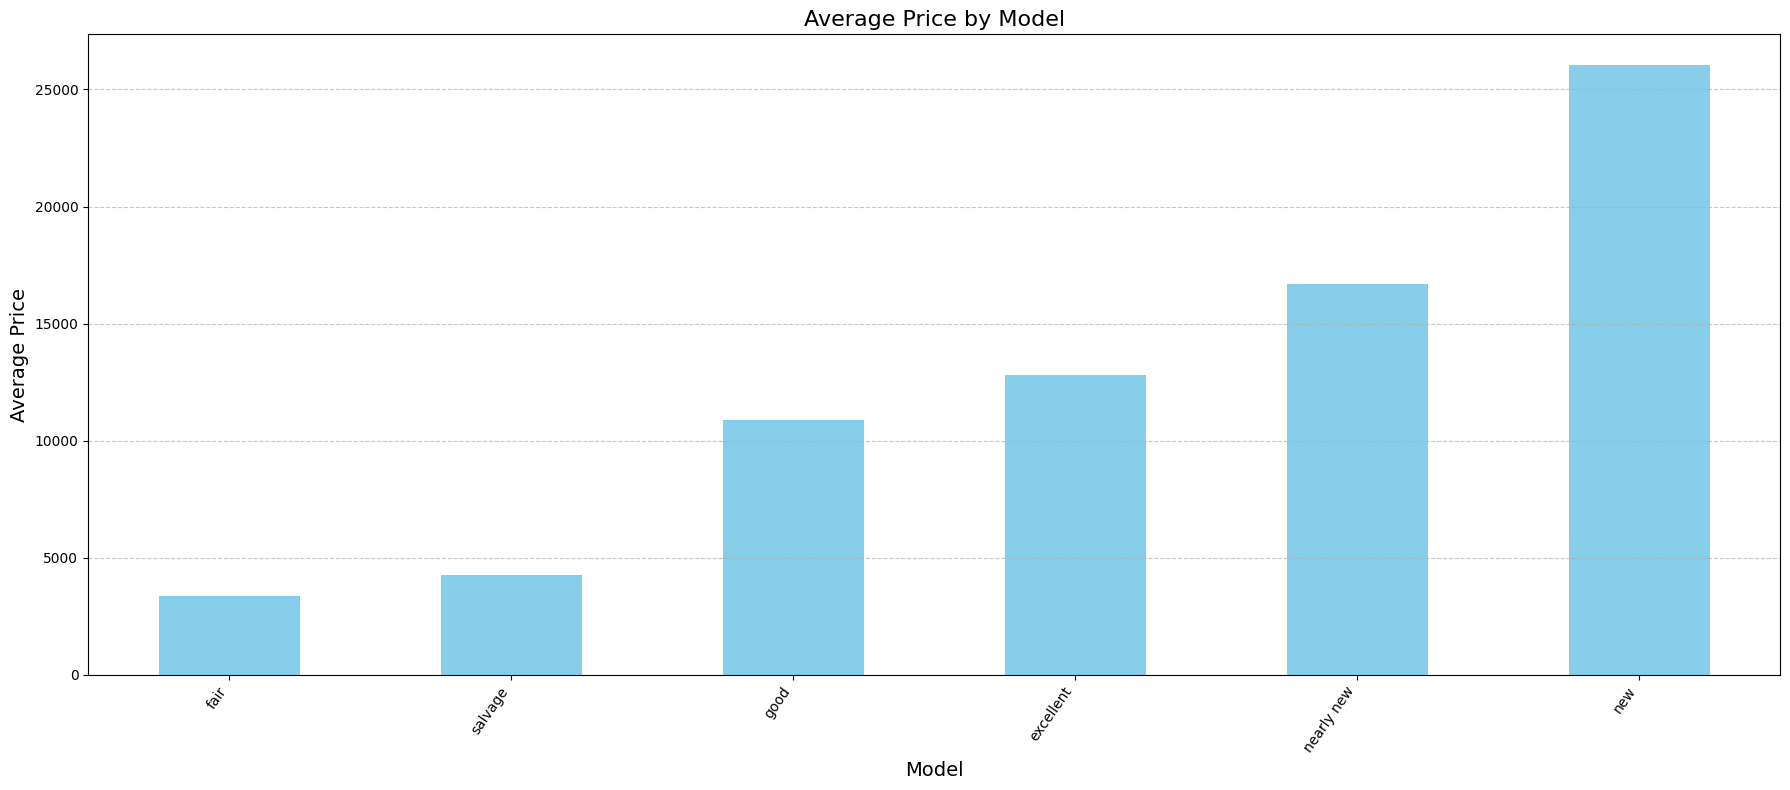

In [78]:
# Plotting
plt.figure(figsize=(18, 8))  # Increased figure size for better visibility
average_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Model', fontsize=16)  # Increased title font size
plt.xlabel('Model', fontsize=14)  # Increased x-axis label font size
plt.ylabel('Average Price', fontsize=14)  # Increased y-axis label font size

# Adjust x-tick labels
plt.xticks(rotation=55, ha='right', fontsize=10)  # Adjust rotation and font size

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

The plot above provides valuable insights for users, but the labels appear somewhat congested. While this issue might be mitigated with more space, it is essential to ensure this plot is included in the final layout. If necessary, adjustments can be made to optimize readability, ensuring that users can easily interpret the information.

According to the available data, this plot appears to be sufficient for the models section, offering a clear overview of the average prices across different models.

#### Based on the Day Listed and Days since listed:

C:\Users\betak\AppData\Local\Temp\ipykernel_13084\1587922157.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



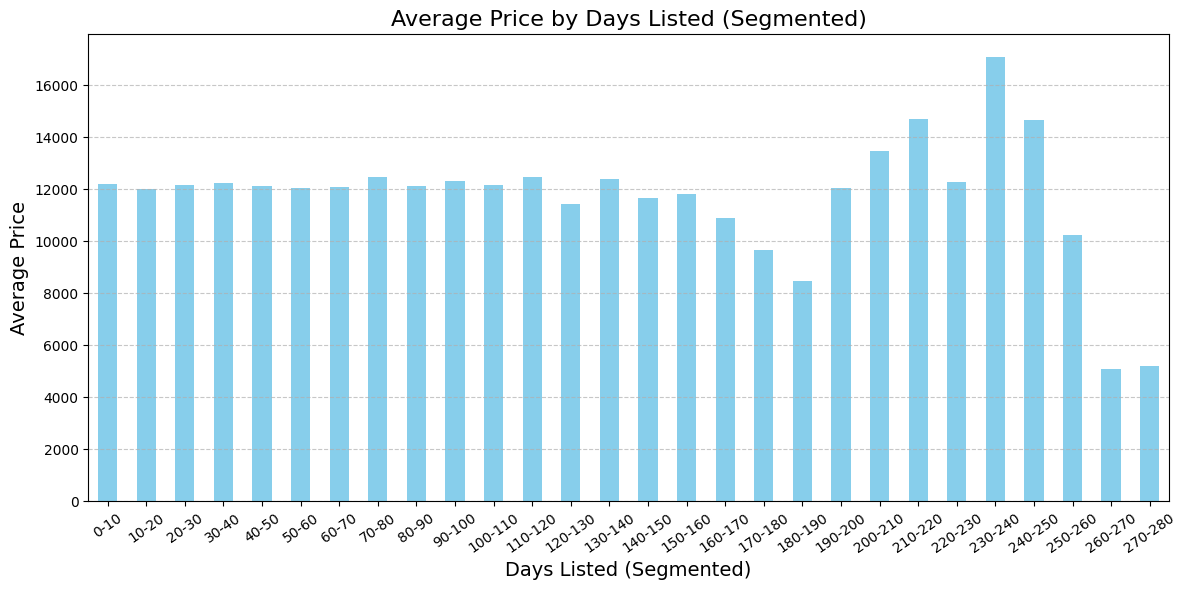

In [79]:
# Define bin edges
bins = range(0, df['days_listed'].max() + 10, 10)
labels = [f'{b}-{b + 10}' for b in bins[:-1]]

# Segment the data into bins
df['days_listed_bin'] = pd.cut(df['days_listed'], bins=bins, labels=labels, right=False)

# Group by the bins and calculate average price
average_price_by_bin = df.groupby('days_listed_bin')['price'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_price_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Price by Days Listed (Segmented)', fontsize=16)
plt.xlabel('Days Listed (Segmented)', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=35)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

The graph above illustrates that cars listed for up to 120 days tend to have an average price around $12,000-with price fluctuations occurring beyond this period. This visualization helps users estimate the likely cost of a car based on its listing duration. To potentially find more affordable options, users might focus on cars listed between 260 and 280 days. For a more typical price range, it would be beneficial to consider cars listed from 0 to 120 days.

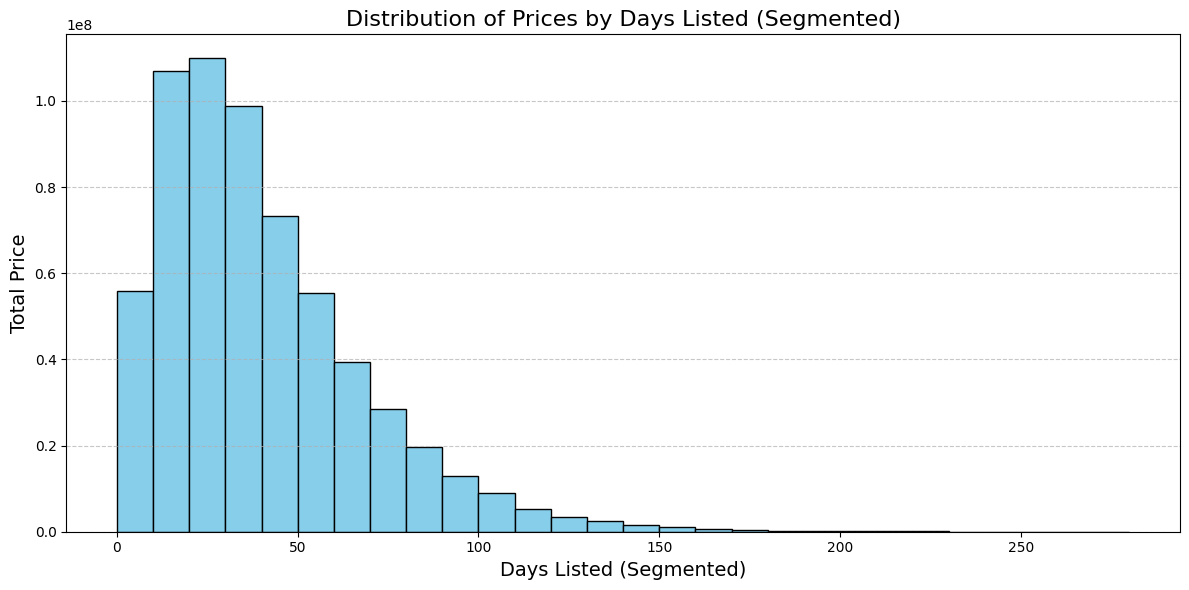

In [80]:
# Define bin edges
bins = range(0, df['days_listed'].max() + 10, 10)

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(df['days_listed'], weights=df['price'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices by Days Listed (Segmented)', fontsize=16)
plt.xlabel('Days Listed (Segmented)', fontsize=14)
plt.ylabel('Total Price', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

The histogram illustrates that cars listed for a shorter duration typically have higher prices. As the number of days listed increases, the average price tends to decrease. This trend suggests that newer listings are generally more expensive. Alternatively, this pattern might also reflect the fact that there are fewer cars with longer listing durations compared to those with shorter listing periods. This discrepancy in the number of cars listed could contribute to the observed price variation.

### hypotheses

#### Excellent condition cars on average cost more than New condition cars. (Proven false)

In [81]:
# Filter data for 'excellent' and 'new' conditions
excellent_prices = df[df['condition'] == 'excellent']['price'].dropna()
new_prices = df[df['condition'] == 'nearly new']['price'].dropna()  # Assuming 'like new' was changed to 'nearly new'

# Perform the t-test
t_stat, p_value = stats.ttest_ind(excellent_prices, new_prices, alternative='greater')

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence that excellent condition cars cost more than nearly new condition cars.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest that excellent condition cars cost more than nearly new condition cars.")

T-statistic: -24.343377589364913
P-value: 1.0
Fail to reject the null hypothesis: There is not enough evidence to suggest that excellent condition cars cost more than nearly new condition cars.


#### The number of cylinders do not have an effect on the price of the car. (Proven false)

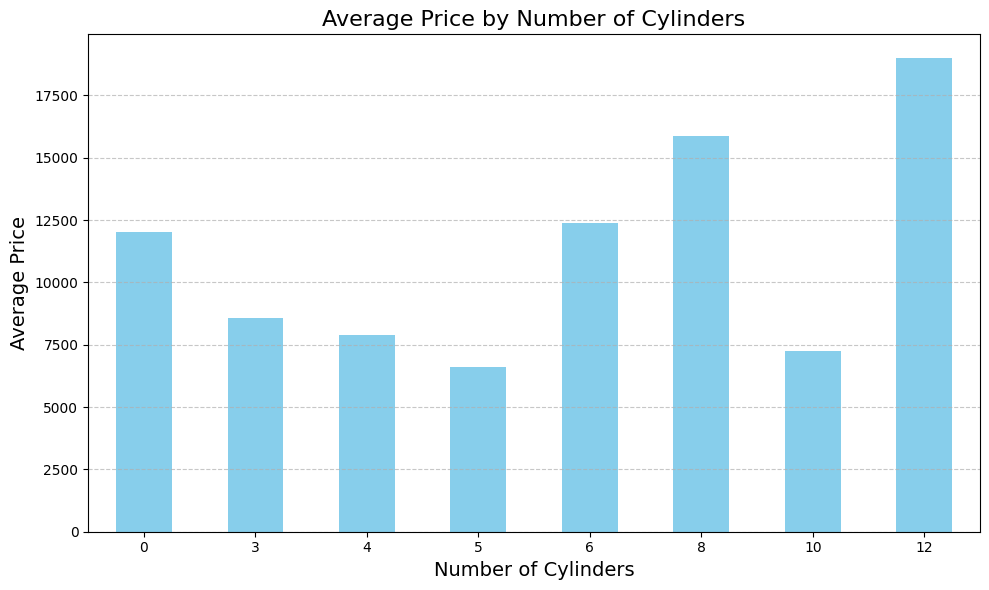

In [82]:
# Calculate average price by number of cylinders
avg_price_by_cylinders = df.groupby('cylinders')['price'].mean().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
avg_price_by_cylinders.plot(kind='bar', color='skyblue')
plt.title('Average Price by Number of Cylinders', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

The analysis indicates that there are differences in average prices based on the number of cylinders. However, this observed effect might not be directly attributable to the number of cylinders themselves. To gain a clearer understanding, we should test a null hypothesis to determine whether the differences in prices are genuinely due to the number of cylinders or if they might be influenced by other factors.

In [83]:
# Prepare data for ANOVA
groups = [df[df['cylinders'] == cyl]['price'] for cyl in df['cylinders'].unique()]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Display results
print(f'F-statistic: {f_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print('There is a significant effect of the number of cylinders on the average price.')
else:
    print('There is no significant effect of the number of cylinders on the average price.')

F-statistic: 775.95
P-value: 0.0000
There is a significant effect of the number of cylinders on the average price.


The results of the null hypothesis test confirm that there is a strong effect of the number of cylinders on the price. This suggests that the observed differences in average prices are indeed significantly influenced by the number of cylinders, rather than being due to random variation or other factors.

#### If the car has four wheel drive, then its price will be higher than those without it. (Proven true)

Average price for cars with 4WD: $15320.23
Average price for cars without 4WD: $8991.50


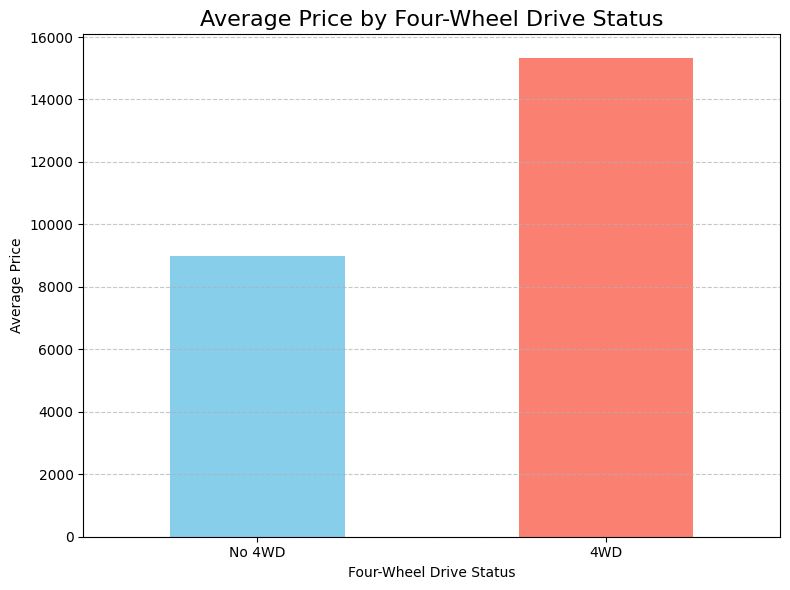

Statistic: 457403325.50
P-value: 0.0000
There is a significant difference in average prices between cars with 4WD and those without.


In [84]:
# Compare average prices
avg_price_4wd = df[df['is_4wd']]['price'].mean()
avg_price_no_4wd = df[~df['is_4wd']]['price'].mean()

print(f'Average price for cars with 4WD: ${avg_price_4wd:.2f}')
print(f'Average price for cars without 4WD: ${avg_price_no_4wd:.2f}')

# Plotting
plt.figure(figsize=(8, 6))
df.groupby('is_4wd')['price'].mean().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Price by Four-Wheel Drive Status', fontsize=16)
plt.xlabel('Four-Wheel Drive Status')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1], labels=['No 4WD', '4WD'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Statistical Test (Mann-Whitney U test)
prices_4wd = df[df['is_4wd']]['price']
prices_no_4wd = df[~df['is_4wd']]['price']

# Perform Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(prices_4wd, prices_no_4wd)

# Display results
print(f'Statistic: {stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print('There is a significant difference in average prices between cars with 4WD and those without.')
else:
    print('There is no significant difference in average prices between cars with 4WD and those without.')

#### The older the car, the cheaper the car will be. (Proven true)

C:\Users\betak\AppData\Local\Temp\ipykernel_13084\2363741092.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



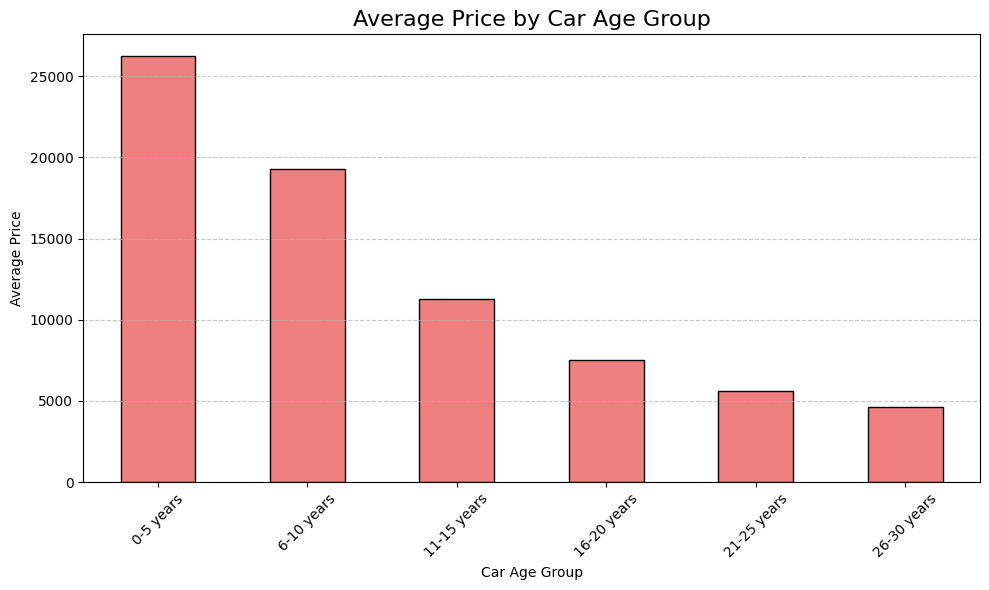

Correlation coefficient: -0.4287
P-value: 0.0000
There is a significant negative correlation between car age and price. Older cars are generally cheaper.


In [85]:
# Calculate car age
df['car_age'] = 2024 - df['model_year']

# Check and handle missing values
df_clean = df[['car_age', 'price']].dropna()

# Verify data types
df_clean['car_age'] = pd.to_numeric(df_clean['car_age'], errors='coerce')
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

# Define age bins
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5 years', '6-10 years', '11-15 years', '16-20 years', '21-25 years', '26-30 years']
df_clean['age_group'] = pd.cut(df_clean['car_age'], bins=bins, labels=labels)

# Calculate average price for each age group
avg_price_by_age = df_clean.groupby('age_group')['price'].mean().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
avg_price_by_age.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Price by Car Age Group', fontsize=16)
plt.xlabel('Car Age Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Statistical Test: Pearson Correlation
correlation, p_value = stats.pearsonr(df_clean['car_age'], df_clean['price'])
print(f'Correlation coefficient: {correlation:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    if correlation < 0:
        print('There is a significant negative correlation between car age and price. Older cars are generally cheaper.')
    else:
        print('There is a significant positive correlation between car age and price. Older cars are generally more expensive.')
else:
    print('There is no significant correlation between car age and price.')

(#### Color does have an effect on the average price of vehicles in this dataset (Proven true)

C:\Users\betak\AppData\Local\Temp\ipykernel_13084\462939737.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





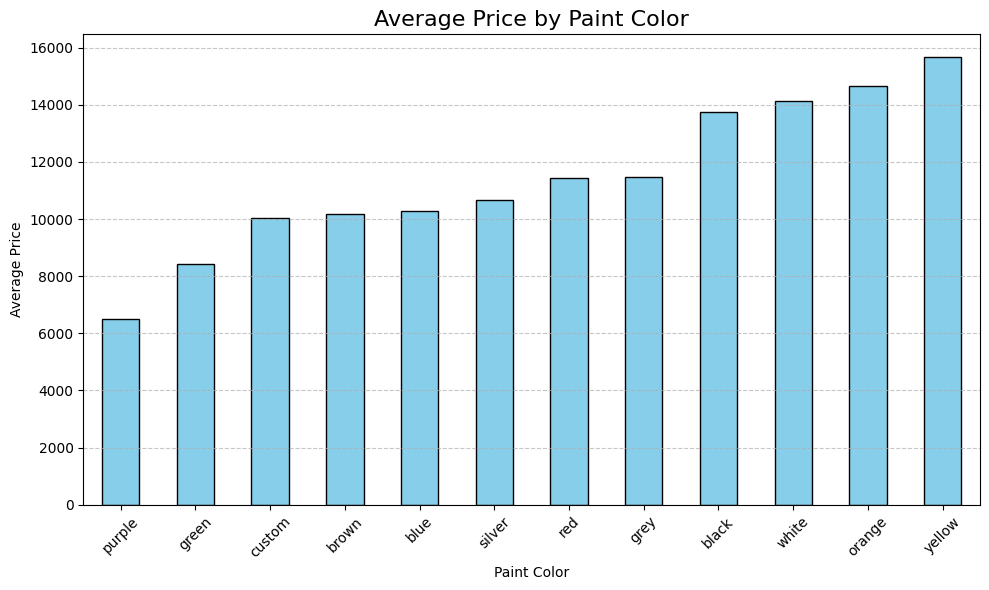

ANOVA F-statistic: 119.2038
P-value: 0.0000
There is a significant effect of paint color on the average price of vehicles.


In [86]:
# Handle missing values
df['paint_color'].replace('unknown', pd.NA, inplace=True)
df.dropna(subset=['paint_color'], inplace=True)

# Calculate average price for each color
avg_price_by_color = df.groupby('paint_color')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
avg_price_by_color.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price by Paint Color', fontsize=16)
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# ANOVA Test
colors = df['paint_color'].unique()
price_by_color = [df[df['paint_color'] == color]['price'] for color in colors]

f_statistic, p_value = stats.f_oneway(*price_by_color)
print(f'ANOVA F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print('There is a significant effect of paint color on the average price of vehicles.')
else:
    print('There is no significant effect of paint color on the average price of vehicles.')